# Comparing XAI


Using Jaccard Similarity to compare features from SHAP and LIME

### Setup
Need to combine both dfs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


from master_thesis.config import PROCESSED_DATA_DIR, load_dataframe_from_pickle, save_dataframe_as_pickle

2025-05-14 12:12:27.605 | INFO     | master_thesis.config:<module>:12 - PROJ_ROOT path is: /home/takosaga/Projects/master_thesis


In [2]:
full_hatespeech_df = load_dataframe_from_pickle(
    PROCESSED_DATA_DIR / "annotated_and_targeted_hatespeech.pkl"
)

full_hatespeech_df.head(5)

,id_new,text,extracted_target,label_hatespeech_binary_offensive_not_included,label_hatespeech_binary_offensive_included,label_normal_offensive_hatespeech,platform,original_dataset_title,original_id,original_label,original_target
0,1,i dont think im getting my baby them white 9 h...,{none},not_hatespeech,normal,normal,twitter,HateXplain,1179055004553900032,normal,[None]
1,2,we cannot continue calling ourselves feminists...,{none},not_hatespeech,normal,normal,twitter,HateXplain,1179063826874032128,normal,[None]
2,3,nawt yall niggers ignoring me,{race},not_hatespeech,normal,normal,twitter,HateXplain,1178793830532956161,normal,[African]
3,4,<user> i am bit confused coz chinese ppl can n...,{race},hatespeech,hatespeech/offensive,hatespeech,twitter,HateXplain,1179088797964763136,hatespeech,[Asian]
4,5,this bitch in whataburger eating a burger with...,"{gender, race}",hatespeech,hatespeech/offensive,hatespeech,twitter,HateXplain,1179085312976445440,hatespeech,"[Caucasian, Women]"


In [3]:
figures_dir = '../reports/figures/'

In [4]:
full_hatespeech_df.columns.to_list()

['id_new',
 'text',
 'extracted_target',
 'label_hatespeech_binary_offensive_not_included',
 'label_hatespeech_binary_offensive_included',
 'label_normal_offensive_hatespeech',
 'platform',
 'original_dataset_title',
 'original_id',
 'original_label',
 'original_target']

In [5]:
columns_to_keep = ['id_new', 'text', 'extracted_target','label_hatespeech_binary_offensive_included','platform']
adjusted_hatespeech_df = full_hatespeech_df[columns_to_keep]


In [6]:
adjusted_hatespeech_df.head(5)

,id_new,text,extracted_target,label_hatespeech_binary_offensive_included,platform
0,1,i dont think im getting my baby them white 9 h...,{none},normal,twitter
1,2,we cannot continue calling ourselves feminists...,{none},normal,twitter
2,3,nawt yall niggers ignoring me,{race},normal,twitter
3,4,<user> i am bit confused coz chinese ppl can n...,{race},hatespeech/offensive,twitter
4,5,this bitch in whataburger eating a burger with...,"{gender, race}",hatespeech/offensive,twitter


In [7]:
adjusted_hatespeech_df['is_hatespeech'] = adjusted_hatespeech_df['label_hatespeech_binary_offensive_included'].apply(lambda x: 1 if x == 'hatespeech/offensive' else 0)
adjusted_hatespeech_df['id'] = adjusted_hatespeech_df['id_new']

/tmp/ipykernel_32622/2421778535.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_32622/2421778535.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
adjusted_hatespeech_df.drop(columns=['label_hatespeech_binary_offensive_included','id_new'], inplace=True)

/tmp/ipykernel_32622/3016290075.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
adjusted_hatespeech_df.head(5)

,text,extracted_target,platform,is_hatespeech,id
0,i dont think im getting my baby them white 9 h...,{none},twitter,0,1
1,we cannot continue calling ourselves feminists...,{none},twitter,0,2
2,nawt yall niggers ignoring me,{race},twitter,0,3
3,<user> i am bit confused coz chinese ppl can n...,{race},twitter,1,4
4,this bitch in whataburger eating a burger with...,"{gender, race}",twitter,1,5


In [10]:
XAI_df = load_dataframe_from_pickle(
    PROCESSED_DATA_DIR / "models_and_XAI_applied.pkl"
)

XAI_df.head(5)

,text,error,cardiff_label,cardiff_score,fb_label,fb_score,lime_cardiff,lime_fb,shap_cardiff,shap_fb,source_file
0,i dont think im getting my baby them white 9 h...,NaN,NOT-HATE,0.992369,hate,0.687105,"and: 0.04, my: 0.04, white: -0.03, 9: -0.03","white: -0.19, touched: -0.12, dont: -0.11, j: ...","i : 0.002, getting : 0.001, my : 0.001, baby :...",": 0.014, i : 0.014, dont : -0.008, think : -0....",df_1
1,we cannot continue calling ourselves feminists...,NaN,NOT-HATE,0.997838,nothate,0.919145,"trans: 0.00, gender: 0.00, addressed: 0.00, fe...","and: 0.13, trans: 0.11, lesbian: 0.11, a: -0.10","calling : 0.013, ourselves : 0.014, feminists ...",": -0.014, we : -0.014, cannot : -0.029, contin...",df_1
2,nawt yall niggers ignoring me,NaN,HATE,0.935527,hate,0.999480,"niggers: -0.90, nawt: -0.09, me: 0.07, yall: 0.07","niggers: -0.96, ignoring: -0.02, nawt: -0.02, ...","n: 0.010, aw: 0.006, t : 0.007, y: 0.003, all ...","n: 0.030, aw: -0.062, t : -0.040, y: 0.129, al...",df_1
3,<user> i am bit confused coz chinese ppl can n...,NaN,HATE,0.997049,hate,0.779210,"chong: -0.44, ching: -0.29, chinese: -0.08, pa...","ching: -0.26, this: -0.24, chong: -0.23, confu...",": -0.005, <: -0.005, user: -0.005, > : -0.005,...",": 0.016, <: 0.016, user: 0.016, > : 0.016, i :...",df_1
4,this bitch in whataburger eating a burger with...,NaN,HATE,0.990916,hate,0.999297,"bitches: -0.44, bitch: -0.28, hate: -0.18, eat...","bitch: -0.39, bitches: -0.30, holding: -0.05, ...","bitch : -0.338, in : -0.145, urger : 0.007, ea...","this : 0.007, bitch : -0.478, in : -0.004, wha...",df_1


In [11]:
d = dtale.show(XAI_df)
d.open_browser()

In [12]:
d.kill()

2025-05-14 12:12:41,407 - INFO     - Executing shutdown...
2025-05-14 12:12:41,407 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


Checking for errors

In [13]:
XAI_df['error'].value_counts()

error
Caught an exception: The expanded size of the tensor (1062) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1062].  Tensor sizes: [1, 514]    1
Name: count, dtype: int64

In [14]:
non_nan_mask = XAI_df['error'].notna()

In [15]:
XAI_df.drop(XAI_df[non_nan_mask].index, inplace=True)

In [16]:
XAI_df['error'].value_counts()

Series([], Name: count, dtype: int64)

In [17]:
XAI_df.columns.to_list()


['text',
 'error',
 'cardiff_label',
 'cardiff_score',
 'fb_label',
 'fb_score',
 'lime_cardiff',
 'lime_fb',
 'shap_cardiff',
 'shap_fb',
 'source_file']

In [18]:
columns_to_keep_2 = ['text', 'cardiff_label', 'cardiff_score', 'shap_cardiff', 'lime_cardiff', 'fb_label','fb_score', 'shap_fb', 'lime_fb']

In [19]:
XAI_df = XAI_df[columns_to_keep_2]

In [20]:
XAI_df.head(5)

,text,cardiff_label,cardiff_score,shap_cardiff,lime_cardiff,fb_label,fb_score,shap_fb,lime_fb
0,i dont think im getting my baby them white 9 h...,NOT-HATE,0.992369,"i : 0.002, getting : 0.001, my : 0.001, baby :...","and: 0.04, my: 0.04, white: -0.03, 9: -0.03",hate,0.687105,": 0.014, i : 0.014, dont : -0.008, think : -0....","white: -0.19, touched: -0.12, dont: -0.11, j: ..."
1,we cannot continue calling ourselves feminists...,NOT-HATE,0.997838,"calling : 0.013, ourselves : 0.014, feminists ...","trans: 0.00, gender: 0.00, addressed: 0.00, fe...",nothate,0.919145,": -0.014, we : -0.014, cannot : -0.029, contin...","and: 0.13, trans: 0.11, lesbian: 0.11, a: -0.10"
2,nawt yall niggers ignoring me,HATE,0.935527,"n: 0.010, aw: 0.006, t : 0.007, y: 0.003, all ...","niggers: -0.90, nawt: -0.09, me: 0.07, yall: 0.07",hate,0.999480,"n: 0.030, aw: -0.062, t : -0.040, y: 0.129, al...","niggers: -0.96, ignoring: -0.02, nawt: -0.02, ..."
3,<user> i am bit confused coz chinese ppl can n...,HATE,0.997049,": -0.005, <: -0.005, user: -0.005, > : -0.005,...","chong: -0.44, ching: -0.29, chinese: -0.08, pa...",hate,0.779210,": 0.016, <: 0.016, user: 0.016, > : 0.016, i :...","ching: -0.26, this: -0.24, chong: -0.23, confu..."
4,this bitch in whataburger eating a burger with...,HATE,0.990916,"bitch : -0.338, in : -0.145, urger : 0.007, ea...","bitches: -0.44, bitch: -0.28, hate: -0.18, eat...",hate,0.999297,"this : 0.007, bitch : -0.478, in : -0.004, wha...","bitch: -0.39, bitches: -0.30, holding: -0.05, ..."


In [21]:
XAI_df['cardiff_hatespeech'] = XAI_df['cardiff_label'].apply(lambda x: 1 if x == 'HATE' else 0)

In [22]:
XAI_df['fb_hatespeech'] = XAI_df['fb_label'].apply(lambda x: 0 if x == 'nothate' else 1)

In [23]:
XAI_df.drop(columns=['cardiff_label','fb_label'], inplace=True)

In [24]:
XAI_df.head(5)

,text,cardiff_score,shap_cardiff,lime_cardiff,fb_score,shap_fb,lime_fb,cardiff_hatespeech,fb_hatespeech
0,i dont think im getting my baby them white 9 h...,0.992369,"i : 0.002, getting : 0.001, my : 0.001, baby :...","and: 0.04, my: 0.04, white: -0.03, 9: -0.03",0.687105,": 0.014, i : 0.014, dont : -0.008, think : -0....","white: -0.19, touched: -0.12, dont: -0.11, j: ...",0,1
1,we cannot continue calling ourselves feminists...,0.997838,"calling : 0.013, ourselves : 0.014, feminists ...","trans: 0.00, gender: 0.00, addressed: 0.00, fe...",0.919145,": -0.014, we : -0.014, cannot : -0.029, contin...","and: 0.13, trans: 0.11, lesbian: 0.11, a: -0.10",0,0
2,nawt yall niggers ignoring me,0.935527,"n: 0.010, aw: 0.006, t : 0.007, y: 0.003, all ...","niggers: -0.90, nawt: -0.09, me: 0.07, yall: 0.07",0.999480,"n: 0.030, aw: -0.062, t : -0.040, y: 0.129, al...","niggers: -0.96, ignoring: -0.02, nawt: -0.02, ...",1,1
3,<user> i am bit confused coz chinese ppl can n...,0.997049,": -0.005, <: -0.005, user: -0.005, > : -0.005,...","chong: -0.44, ching: -0.29, chinese: -0.08, pa...",0.779210,": 0.016, <: 0.016, user: 0.016, > : 0.016, i :...","ching: -0.26, this: -0.24, chong: -0.23, confu...",1,1
4,this bitch in whataburger eating a burger with...,0.990916,"bitch : -0.338, in : -0.145, urger : 0.007, ea...","bitches: -0.44, bitch: -0.28, hate: -0.18, eat...",0.999297,"this : 0.007, bitch : -0.478, in : -0.004, wha...","bitch: -0.39, bitches: -0.30, holding: -0.05, ...",1,1


In [25]:
full_df = pd.merge(adjusted_hatespeech_df,XAI_df, on='text', how='inner')

In [26]:
full_df.head()

,text,extracted_target,platform,is_hatespeech,id,cardiff_score,shap_cardiff,lime_cardiff,fb_score,shap_fb,lime_fb,cardiff_hatespeech,fb_hatespeech
0,i dont think im getting my baby them white 9 h...,{none},twitter,0,1,0.992369,"i : 0.002, getting : 0.001, my : 0.001, baby :...","and: 0.04, my: 0.04, white: -0.03, 9: -0.03",0.687105,": 0.014, i : 0.014, dont : -0.008, think : -0....","white: -0.19, touched: -0.12, dont: -0.11, j: ...",0,1
1,we cannot continue calling ourselves feminists...,{none},twitter,0,2,0.997838,"calling : 0.013, ourselves : 0.014, feminists ...","trans: 0.00, gender: 0.00, addressed: 0.00, fe...",0.919145,": -0.014, we : -0.014, cannot : -0.029, contin...","and: 0.13, trans: 0.11, lesbian: 0.11, a: -0.10",0,0
2,nawt yall niggers ignoring me,{race},twitter,0,3,0.935527,"n: 0.010, aw: 0.006, t : 0.007, y: 0.003, all ...","niggers: -0.90, nawt: -0.09, me: 0.07, yall: 0.07",0.999480,"n: 0.030, aw: -0.062, t : -0.040, y: 0.129, al...","niggers: -0.96, ignoring: -0.02, nawt: -0.02, ...",1,1
3,<user> i am bit confused coz chinese ppl can n...,{race},twitter,1,4,0.997049,": -0.005, <: -0.005, user: -0.005, > : -0.005,...","chong: -0.44, ching: -0.29, chinese: -0.08, pa...",0.779210,": 0.016, <: 0.016, user: 0.016, > : 0.016, i :...","ching: -0.26, this: -0.24, chong: -0.23, confu...",1,1
4,this bitch in whataburger eating a burger with...,"{gender, race}",twitter,1,5,0.990916,"bitch : -0.338, in : -0.145, urger : 0.007, ea...","bitches: -0.44, bitch: -0.28, hate: -0.18, eat...",0.999297,"this : 0.007, bitch : -0.478, in : -0.004, wha...","bitch: -0.39, bitches: -0.30, holding: -0.05, ...",1,1


### Preping for comparison
Need make a set of features

Lime only needs to extract the words

Shap needs to find top 4 calculations 

In [27]:
full_df['lime_cardiff'][0]

'and: 0.04, my: 0.04, white: -0.03, 9: -0.03'

In [28]:
full_df['shap_cardiff'][0]

'i : 0.002, getting : 0.001, my : 0.001, baby : 0.002, them : -0.007, white : -0.009, 9 : 0.002, he : 0.001, has : 0.025, two : 0.002, white : -0.013, j : -0.004, and : 0.005, n: -0.004, ikes : -0.004, not : -0.001, even : -0.004, touched: 0.002'

In [29]:
import pandas as pd
import re

# Assuming your DataFrame is called 'df' and the column is called 'text_column'
# Replace with your actual DataFrame and column name

# Example DataFrame (replace with your actual data)
data = {'text_column': ['white: -0.19, touched: -0.12, dont: -0.11, j: -0.10',
                        'black: 0.25, white: 0.15, yes: 0.05',
                        'dont: -0.50, maybe: -0.20']}
df = pd.DataFrame(data)

def extract_words_to_set(text):
  """
  Extracts words from a string in the format 'word: number, word: number'
  and returns them as a set.

  Args:
    text: The input string.

  Returns:
    A set of words found in the string.
  """
  if isinstance(text, str):
    # Split by comma and space, then iterate through pairs
    pairs = text.split(', ')
    words = set()
    for pair in pairs:
      # Split each pair by the colon and take the first part (the word)
      word = pair.split(':')[0]
      words.add(word.strip()) # Use strip() to remove any leading/trailing whitespace
    return words
  else:
    # Handle potential non-string values if necessary (e.g., NaNs)
    return set() # Return an empty set for non-string inputs

# Apply the function to the column
df['words_set'] = df['text_column'].apply(extract_words_to_set)

# Now the 'words_set' column contains a set of words for each row
print(df)

                                         text_column  \
0  white: -0.19, touched: -0.12, dont: -0.11, j: ...   
1                black: 0.25, white: 0.15, yes: 0.05   
2                          dont: -0.50, maybe: -0.20   

                   words_set  
0  {j, white, dont, touched}  
1        {black, white, yes}  
2              {maybe, dont}  


In [30]:
full_df['lime_cardiff_wordset'] = full_df['lime_cardiff'].apply(extract_words_to_set)

In [31]:
full_df['lime_cardiff_wordset'][0]

{'9', 'and', 'my', 'white'}

In [32]:
full_df['lime_fb_wordset'] = full_df['lime_fb'].apply(extract_words_to_set)


In [33]:
full_df['lime_fb_wordset'][0]

{'dont', 'j', 'touched', 'white'}

In [34]:
import pandas as pd
import re

# Assuming your DataFrame is called 'df' and the column is called 'text_column'
# Replace with your actual DataFrame and column name

# Example DataFrame with the new string format (replace with your actual data)
data = {'text_column': ['i : 0.002, getting : 0.001, my : 0.001, baby : 0.002, them : -0.007, white : -0.009, 9 : 0.002, he : 0.001, has : 0.025, two : 0.002, white : -0.013, j : -0.004, and : 0.005, n : -0.004, ikes : -0.004, not : -0.001, even : -0.004, touched : 0.002',
                        'apple : 0.10, banana : -0.20, cherry : 0.05',
                        'date : -0.15']}
df = pd.DataFrame(data)

def extract_top_words_by_abs_value(text, num_top_words=4):
  """
  Extracts words associated with the top absolute numerical values from a string.

  Args:
    text: The input string in the format 'word : number, word : number, ...'.
    num_top_words: The number of words with the highest absolute values to return.

  Returns:
    A set of the top words.
    Returns an empty set if the input is not a string or cannot be parsed.
  """
  if not isinstance(text, str) or not text.strip():
    return set() # Return empty set for non-string or empty strings

  word_value_pairs = []
  # Split by comma, then iterate through pairs
  pairs = text.split(',')

  for pair in pairs:
    try:
      # Split by ' : ', handle potential extra spaces
      parts = pair.strip().split(' : ')
      if len(parts) == 2:
        word = parts[0].strip()
        value_str = parts[1].strip()
        value = float(value_str)
        word_value_pairs.append((word, abs(value)))
    except ValueError:
      # Handle cases where value is not a valid float
      print(f"Warning: Could not parse value for pair '{pair}'. Skipping.")
      continue
    except IndexError:
        # Handle cases where the split didn't result in 2 parts
        print(f"Warning: Could not parse pair '{pair}'. Skipping.")
        continue


  # Sort pairs by absolute value in descending order
  sorted_pairs = sorted(word_value_pairs, key=lambda item: item[1], reverse=True)

  # Get the top N words
  top_words = [word for word, abs_value in sorted_pairs[:num_top_words]]

  # Return the top words as a set
  return set(top_words)

# Apply the function to the column
# You can change num_top_words to get a different number of words
df['top_words_set'] = df['text_column'].apply(lambda x: extract_top_words_by_abs_value(x, num_top_words=5)) # Getting the top 5 words

# Now the 'top_words_set' column contains a set of the top words for each row
print(df)

                                         text_column            top_words_set
0  i : 0.002, getting : 0.001, my : 0.001, baby :...  {has, white, them, and}
1        apple : 0.10, banana : -0.20, cherry : 0.05  {banana, cherry, apple}
2                                       date : -0.15                   {date}


In [35]:
full_df['shap_cardiff_wordset'] = full_df['shap_cardiff'].apply(lambda x: extract_top_words_by_abs_value(x, num_top_words=4))

In [36]:
full_df['shap_cardiff_wordset'][0]

{'has', 'them', 'white'}

In [37]:
full_df['shap_fb_wordset'] = full_df['shap_fb'].apply(lambda x: extract_top_words_by_abs_value(x, num_top_words=4))

In [38]:
full_df['shap_fb_wordset'][0]

{'not', 'them', 'white'}

In [39]:
full_df.head()

,text,extracted_target,platform,is_hatespeech,id,cardiff_score,shap_cardiff,lime_cardiff,fb_score,shap_fb,lime_fb,cardiff_hatespeech,fb_hatespeech,lime_cardiff_wordset,lime_fb_wordset,shap_cardiff_wordset,shap_fb_wordset
0,i dont think im getting my baby them white 9 h...,{none},twitter,0,1,0.992369,"i : 0.002, getting : 0.001, my : 0.001, baby :...","and: 0.04, my: 0.04, white: -0.03, 9: -0.03",0.687105,": 0.014, i : 0.014, dont : -0.008, think : -0....","white: -0.19, touched: -0.12, dont: -0.11, j: ...",0,1,"{and, white, my, 9}","{j, white, dont, touched}","{has, white, them}","{white, them, not}"
1,we cannot continue calling ourselves feminists...,{none},twitter,0,2,0.997838,"calling : 0.013, ourselves : 0.014, feminists ...","trans: 0.00, gender: 0.00, addressed: 0.00, fe...",0.919145,": -0.014, we : -0.014, cannot : -0.029, contin...","and: 0.13, trans: 0.11, lesbian: 0.11, a: -0.10",0,0,"{feminists, gender, addressed, trans}","{and, trans, a, lesbian}","{feminists, ourselves, calling, bisexual}","{feminists, reporting, sheet, if}"
2,nawt yall niggers ignoring me,{race},twitter,0,3,0.935527,"n: 0.010, aw: 0.006, t : 0.007, y: 0.003, all ...","niggers: -0.90, nawt: -0.09, me: 0.07, yall: 0.07",0.999480,"n: 0.030, aw: -0.062, t : -0.040, y: 0.129, al...","niggers: -0.96, ignoring: -0.02, nawt: -0.02, ...",1,1,"{yall, niggers, nawt, me}","{ignoring, yall, niggers, nawt}","{gers, all, ignoring, t}","{gers, all, ignoring, t}"
3,<user> i am bit confused coz chinese ppl can n...,{race},twitter,1,4,0.997049,": -0.005, <: -0.005, user: -0.005, > : -0.005,...","chong: -0.44, ching: -0.29, chinese: -0.08, pa...",0.779210,": 0.016, <: 0.016, user: 0.016, > : 0.016, i :...","ching: -0.26, this: -0.24, chong: -0.23, confu...",1,1,"{pakistani, ching, chong, chinese}","{chong, this, ching, confused}","{ong, inese, am, ing}","{inese, this, ing, how}"
4,this bitch in whataburger eating a burger with...,"{gender, race}",twitter,1,5,0.990916,"bitch : -0.338, in : -0.145, urger : 0.007, ea...","bitches: -0.44, bitch: -0.28, hate: -0.18, eat...",0.999297,"this : 0.007, bitch : -0.478, in : -0.004, wha...","bitch: -0.39, bitches: -0.30, holding: -0.05, ...",1,1,"{eating, bitches, bitch, hate}","{bitches, bitch, holding, i}","{white, bitch, hate, in}","{white, bitch, hate, burger}"


### Applying Jaccard Similarity

In [40]:
import pandas as pd

# --- Re-using the jaccard_similarity function from before ---
def jaccard_similarity(set1, set2):
  """
  Calculates the Jaccard Similarity between two sets.

  Args:
    set1: The first set of elements.
    set2: The second set of elements.

  Returns:
    The Jaccard Similarity score (a float between 0 and 1).
    Returns 0.0 if both sets are empty or inputs are not sets.
  """
  # Add a check to ensure inputs are sets
  if not isinstance(set1, set) or not isinstance(set2, set):
      # Or handle non-set inputs appropriately, maybe return 0 or NaN
      # For this example, let's return 0.0 and print a warning
      print(f"Warning: Inputs are not both sets. Received {type(set1)} and {type(set2)}")
      return 0.0

  intersection = set1.intersection(set2)
  union = set1.union(set2)

  if not union:
    return 0.0

  similarity = len(intersection) / len(union)

  return similarity

In [41]:
full_df['jaccard_similarity_cardiff'] = full_df.apply(
    lambda row: jaccard_similarity(row['shap_cardiff_wordset'], row['lime_cardiff_wordset']),
    axis=1 
)

In [42]:
full_df['jaccard_similarity_fb'] = full_df.apply(
    lambda row: jaccard_similarity(row['shap_fb_wordset'], row['lime_fb_wordset']),
    axis=1 
)

In [43]:
full_df.head()

,text,extracted_target,platform,is_hatespeech,id,cardiff_score,shap_cardiff,lime_cardiff,fb_score,shap_fb,lime_fb,cardiff_hatespeech,fb_hatespeech,lime_cardiff_wordset,lime_fb_wordset,shap_cardiff_wordset,shap_fb_wordset,jaccard_similarity_cardiff,jaccard_similarity_fb
0,i dont think im getting my baby them white 9 h...,{none},twitter,0,1,0.992369,"i : 0.002, getting : 0.001, my : 0.001, baby :...","and: 0.04, my: 0.04, white: -0.03, 9: -0.03",0.687105,": 0.014, i : 0.014, dont : -0.008, think : -0....","white: -0.19, touched: -0.12, dont: -0.11, j: ...",0,1,"{and, white, my, 9}","{j, white, dont, touched}","{has, white, them}","{white, them, not}",0.166667,0.166667
1,we cannot continue calling ourselves feminists...,{none},twitter,0,2,0.997838,"calling : 0.013, ourselves : 0.014, feminists ...","trans: 0.00, gender: 0.00, addressed: 0.00, fe...",0.919145,": -0.014, we : -0.014, cannot : -0.029, contin...","and: 0.13, trans: 0.11, lesbian: 0.11, a: -0.10",0,0,"{feminists, gender, addressed, trans}","{and, trans, a, lesbian}","{feminists, ourselves, calling, bisexual}","{feminists, reporting, sheet, if}",0.142857,0.000000
2,nawt yall niggers ignoring me,{race},twitter,0,3,0.935527,"n: 0.010, aw: 0.006, t : 0.007, y: 0.003, all ...","niggers: -0.90, nawt: -0.09, me: 0.07, yall: 0.07",0.999480,"n: 0.030, aw: -0.062, t : -0.040, y: 0.129, al...","niggers: -0.96, ignoring: -0.02, nawt: -0.02, ...",1,1,"{yall, niggers, nawt, me}","{ignoring, yall, niggers, nawt}","{gers, all, ignoring, t}","{gers, all, ignoring, t}",0.000000,0.142857
3,<user> i am bit confused coz chinese ppl can n...,{race},twitter,1,4,0.997049,": -0.005, <: -0.005, user: -0.005, > : -0.005,...","chong: -0.44, ching: -0.29, chinese: -0.08, pa...",0.779210,": 0.016, <: 0.016, user: 0.016, > : 0.016, i :...","ching: -0.26, this: -0.24, chong: -0.23, confu...",1,1,"{pakistani, ching, chong, chinese}","{chong, this, ching, confused}","{ong, inese, am, ing}","{inese, this, ing, how}",0.000000,0.142857
4,this bitch in whataburger eating a burger with...,"{gender, race}",twitter,1,5,0.990916,"bitch : -0.338, in : -0.145, urger : 0.007, ea...","bitches: -0.44, bitch: -0.28, hate: -0.18, eat...",0.999297,"this : 0.007, bitch : -0.478, in : -0.004, wha...","bitch: -0.39, bitches: -0.30, holding: -0.05, ...",1,1,"{eating, bitches, bitch, hate}","{bitches, bitch, holding, i}","{white, bitch, hate, in}","{white, bitch, hate, burger}",0.333333,0.142857


In [42]:
save_dataframe_as_pickle(full_df, PROCESSED_DATA_DIR.as_posix() + '/models_and_XAI_with_jaccard_similarity_applied.pkl')

DataFrame saved to /home/takosaga/Projects/master_thesis/data/processed/models_and_XAI_with_jaccard_similarity_applied.pkl


In [43]:
full_df.to_csv(PROCESSED_DATA_DIR.as_posix() + '/models_and_XAI_with_jaccard_similarity_applied.csv', index=False)

### Confusion Matrix


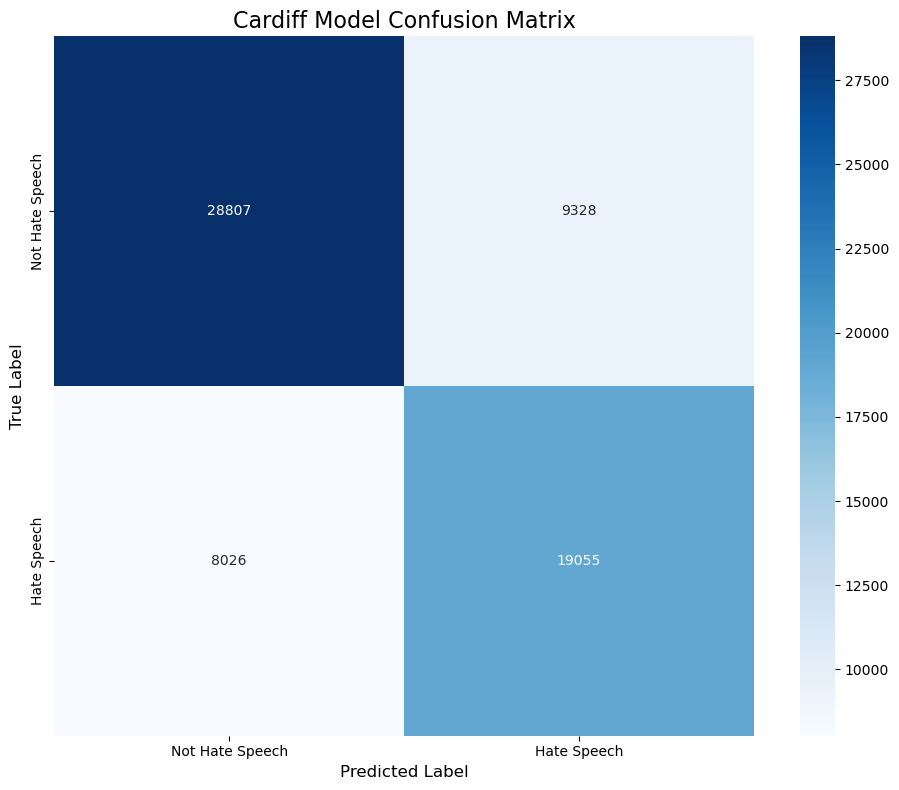

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

class_names = ['Not Hate Speech','Hate Speech']

cm = confusion_matrix(full_df['is_hatespeech'], full_df['cardiff_hatespeech'])
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, 
            xticklabels=class_names, yticklabels=class_names, ax=ax)


# Labels and title
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.title('Cardiff Model Confusion Matrix', fontsize=16)

plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'cardiff_confusion_matrix.svg'), format='svg')

plt.show()

In [46]:
report = classification_report(full_df['is_hatespeech'], full_df['cardiff_hatespeech'])
print(report)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     38135
           1       0.67      0.70      0.69     27081

    accuracy                           0.73     65216
   macro avg       0.73      0.73      0.73     65216
weighted avg       0.74      0.73      0.73     65216



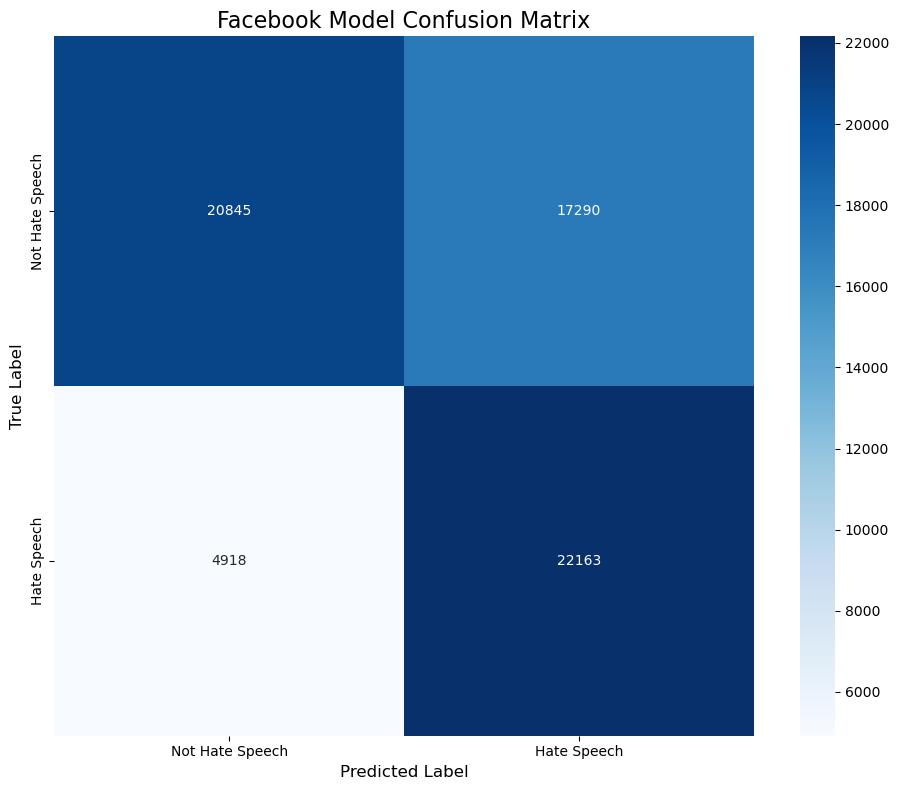

In [47]:
from sklearn.metrics import confusion_matrix

class_names = ['Not Hate Speech','Hate Speech']

cm = confusion_matrix(full_df['is_hatespeech'], full_df['fb_hatespeech'])
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, 
            xticklabels=class_names, yticklabels=class_names, ax=ax)


# Labels and title
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.title('Facebook Model Confusion Matrix', fontsize=16)

plt.tight_layout()

plt.savefig(os.path.join(figures_dir, 'facebook_confusion_matrix.svg'), format='svg')

plt.show()

In [48]:
report = classification_report(full_df['is_hatespeech'], full_df['fb_hatespeech'])
print(report)

              precision    recall  f1-score   support

           0       0.81      0.55      0.65     38135
           1       0.56      0.82      0.67     27081

    accuracy                           0.66     65216
   macro avg       0.69      0.68      0.66     65216
weighted avg       0.71      0.66      0.66     65216



### Similarity 

In [49]:
fb_average_value = full_df['jaccard_similarity_fb'].mean()

In [50]:
fb_average_value

0.2323315706925557

In [51]:
cardiff_average_value = full_df['jaccard_similarity_cardiff'].mean()

In [52]:
cardiff_average_value

0.21382314886209638

In [53]:
# Assuming your DataFrame is called 'df' and the column you want to plot is 'your_column'
def create_boxplot(df, column_name, title_name, set_type='multiple', color='#228B22'):
    """
    Generates a box plot for a specified column in a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be plotted.
    """
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(y=df[column_name], color=color)
    plt.title(f'Box Plot of {column_name} of {title_name} for {set_type} targets in sets')
    plt.ylabel(column_name)
    plt.show()


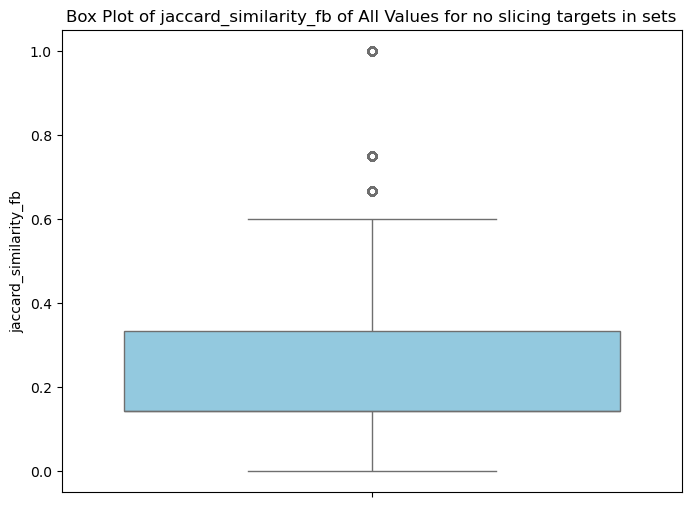

In [54]:

create_boxplot(full_df, 'jaccard_similarity_fb', 'All Values',set_type='no slicing',color='skyblue')

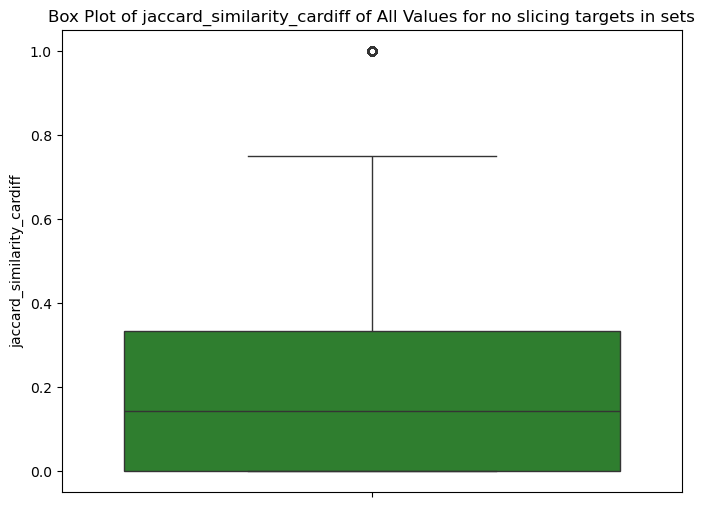

In [55]:
create_boxplot(full_df, 'jaccard_similarity_cardiff', 'All Values', set_type='no slicing')

### 

In [56]:
exploded_full_df = full_df.explode('extracted_target')


In [57]:
exploded_full_df['extracted_target'].value_counts()

extracted_target
gender         17506
race           17317
nationality    11966
religion       10929
sexuality      10216
none            7685
other           4423
disability      2885
Name: count, dtype: int64

### Multiple Targets in Targeted Group

In [58]:
category_names = exploded_full_df['extracted_target'].value_counts().index.tolist()

print(category_names)

['gender', 'race', 'nationality', 'religion', 'sexuality', 'none', 'other', 'disability']


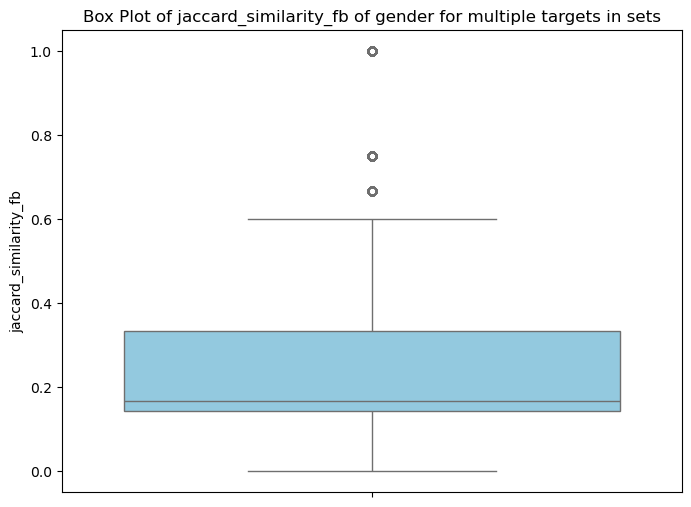

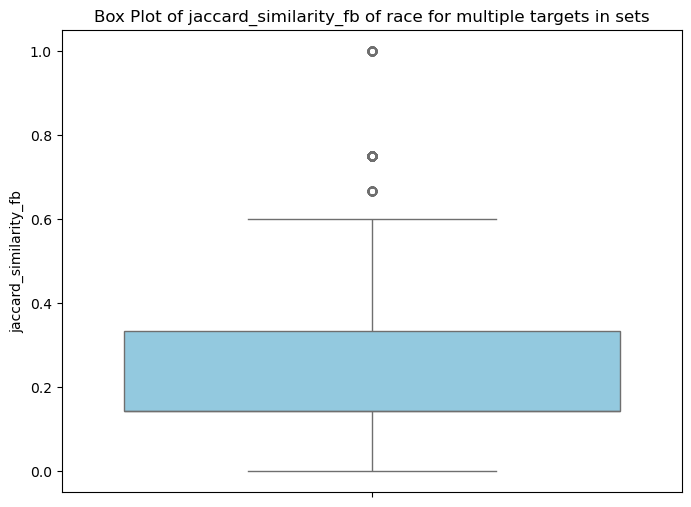

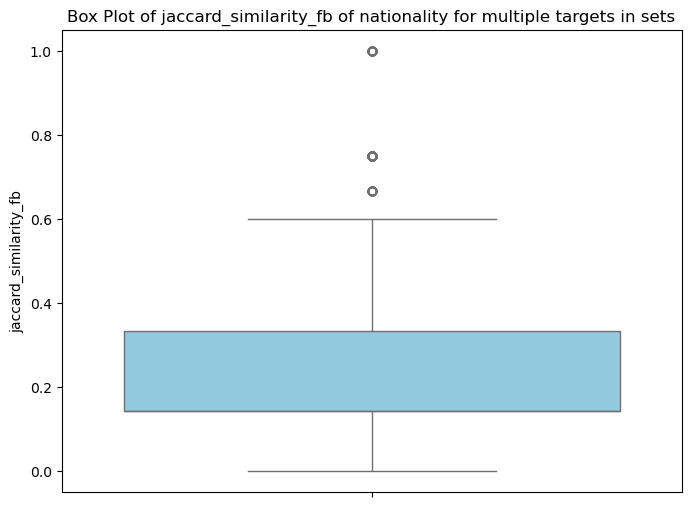

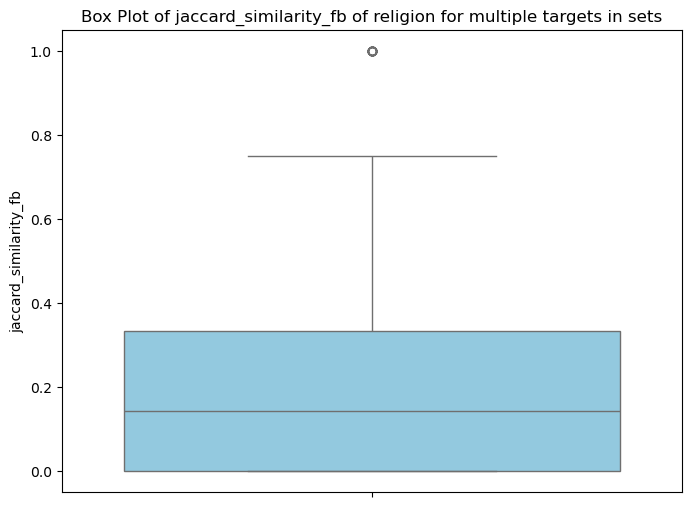

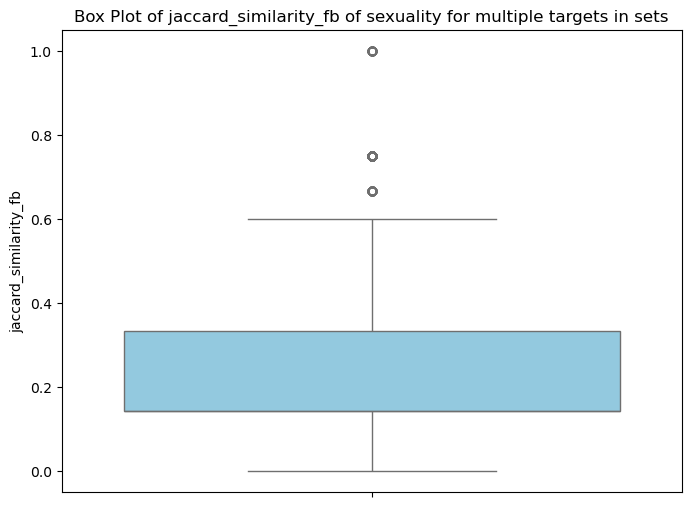

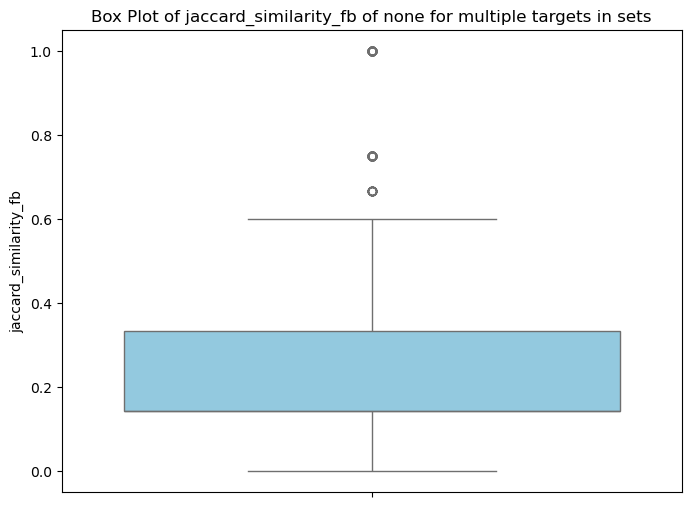

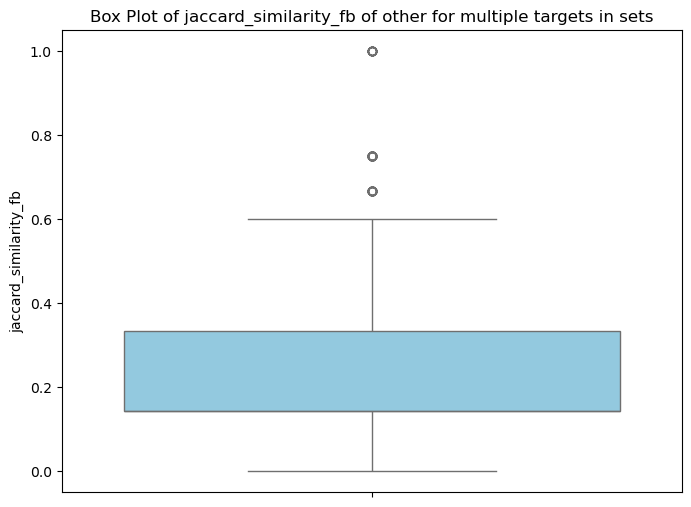

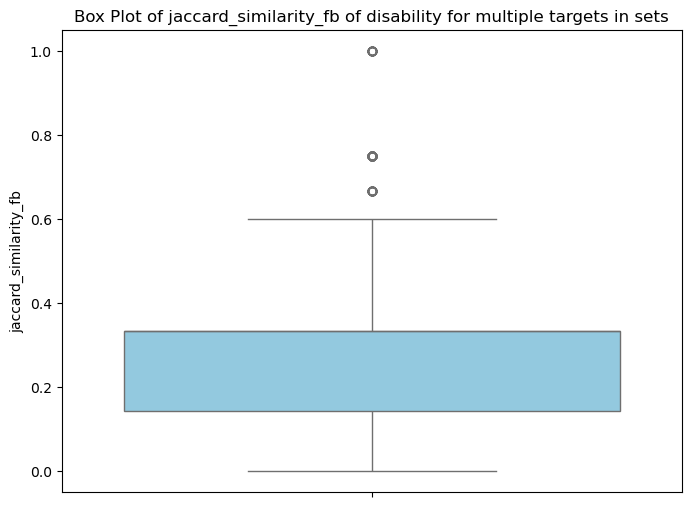

In [59]:
for category in category_names:
    # Filter rows for this specific category
    filtered_df = exploded_full_df[exploded_full_df['extracted_target'] == category]
    create_boxplot(filtered_df,'jaccard_similarity_fb', category,color='skyblue')

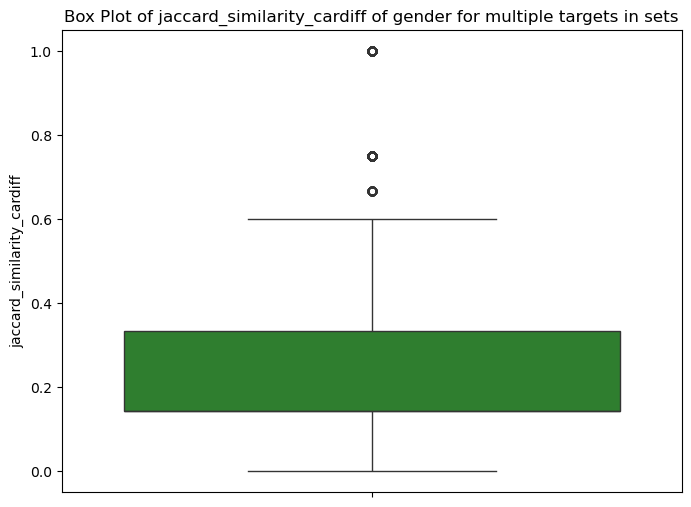

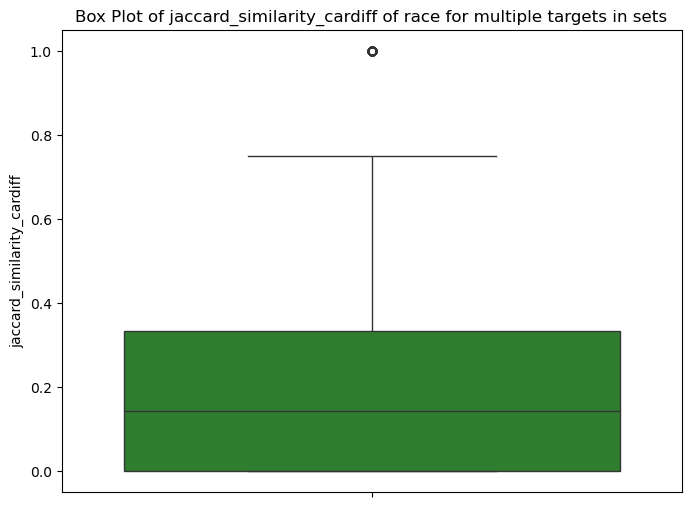

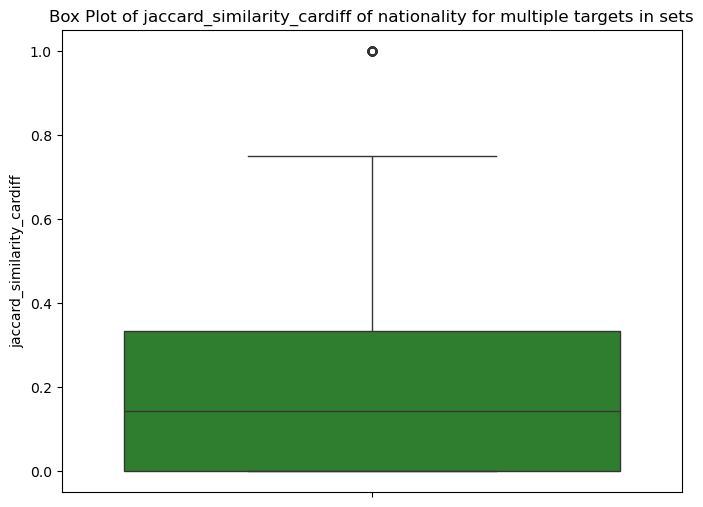

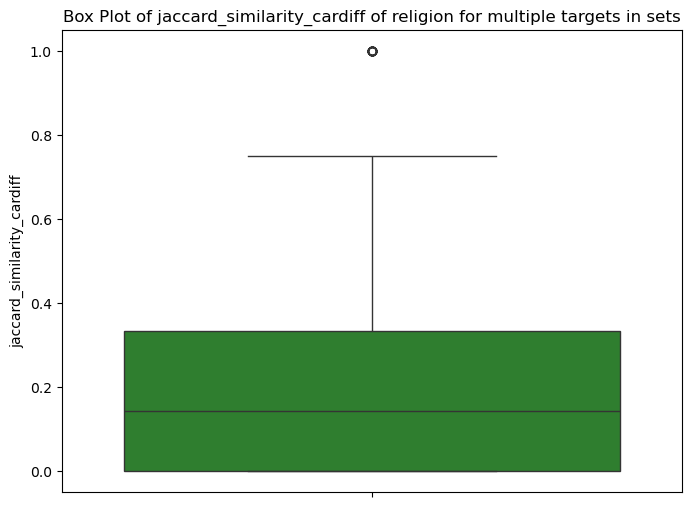

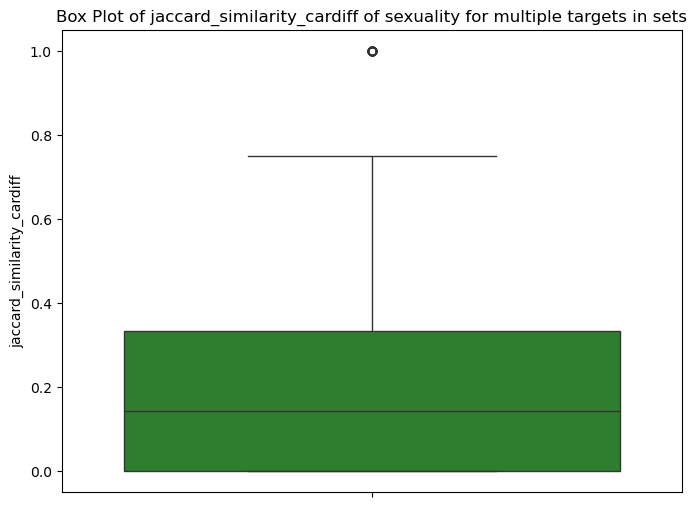

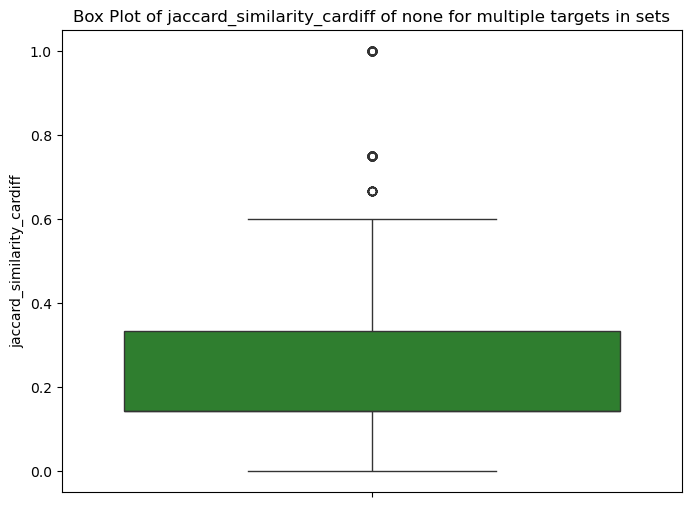

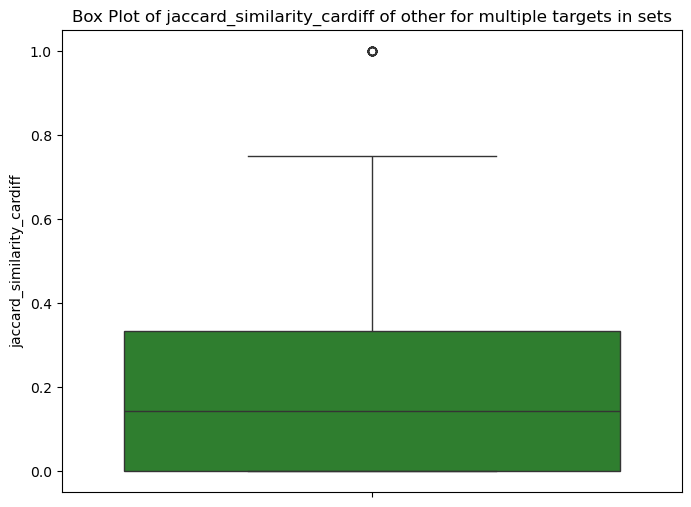

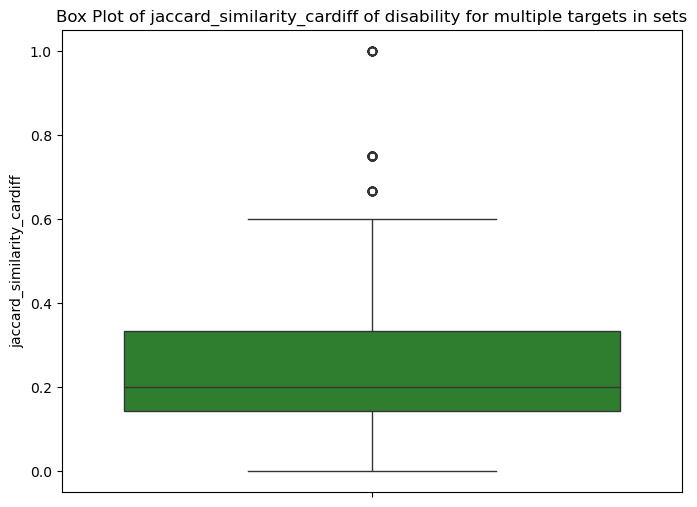

In [60]:
for category in category_names:
    # Filter rows for this specific category
    filtered_df = exploded_full_df[exploded_full_df['extracted_target'] == category]
    create_boxplot(filtered_df,'jaccard_similarity_cardiff', category)

In [72]:
def boxplot_by_target(df, y_col, title, color='#228B22'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='extracted_target',
        y=y_col,
        data=df,
        color=color,        # uniform color
        order=sorted(df['extracted_target'].unique())
    )
    plt.title(title, fontsize=14)
    plt.xlabel('Target Category', fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

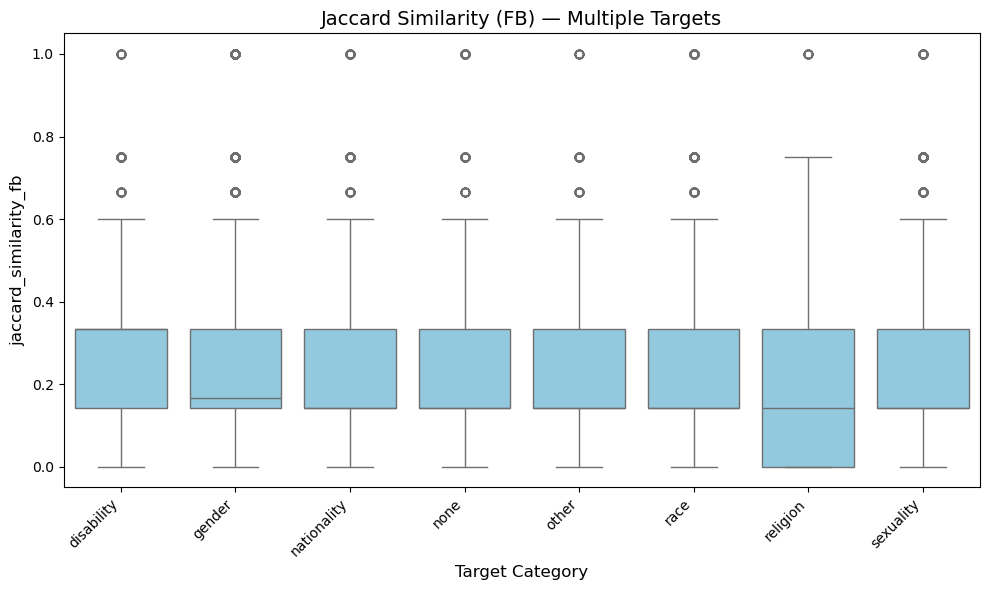

In [82]:
boxplot_by_target(
    exploded_full_df, 
    'jaccard_similarity_fb',
    'Jaccard Similarity (FB) — Multiple Targets',
    'skyblue'
)

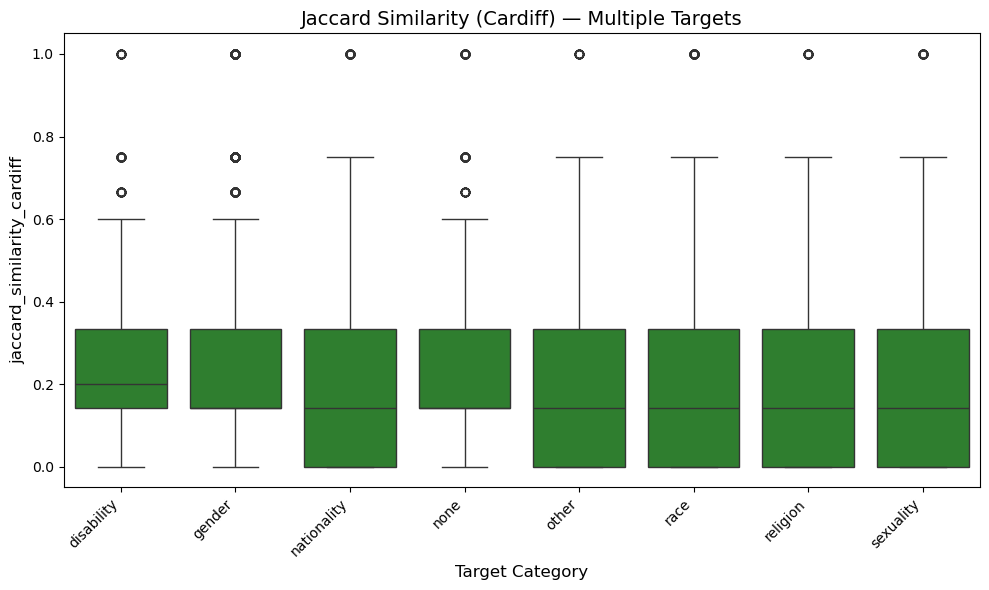

In [ ]:
boxplot_by_target(
    exploded_full_df,
    'jaccard_similarity_cardiff',
    'Jaccard Similarity (Cardiff) — Multiple Targets'
)


### Single Target in Targeted Group

In [61]:
single_target_full_df = full_df[
    full_df['extracted_target'].apply(lambda x: len(x) == 1)
]

single_target_full_df['extracted_target'] = single_target_full_df['extracted_target'].apply(lambda x: list(x)[0])

/tmp/ipykernel_248317/1907079924.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



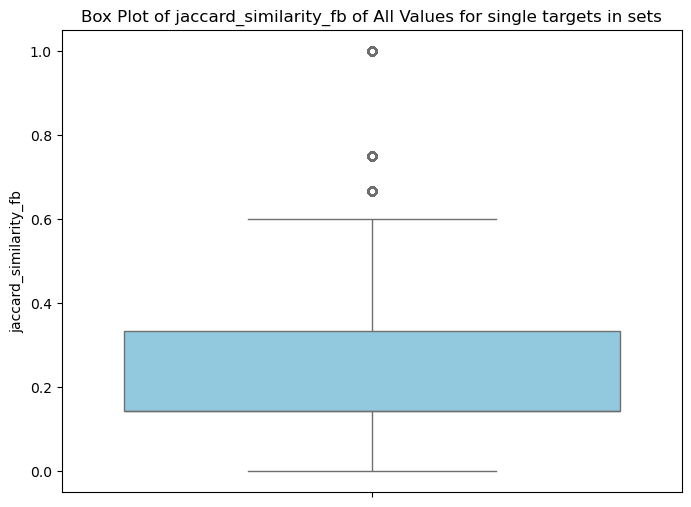

In [62]:

create_boxplot(single_target_full_df, 'jaccard_similarity_fb', 'All Values', 'single',color='skyblue')

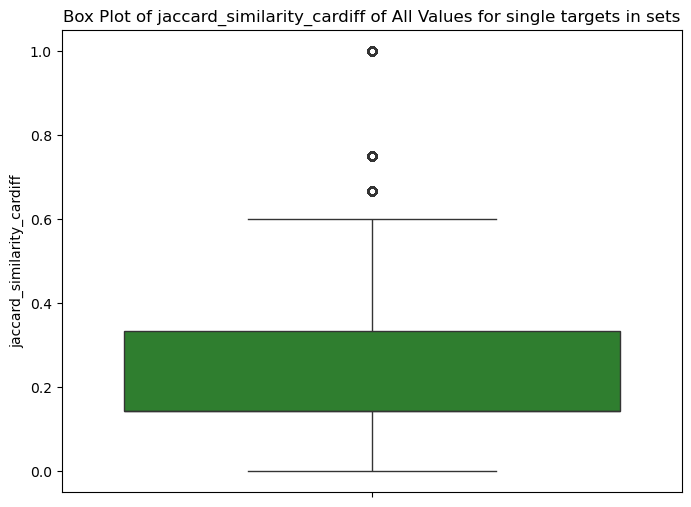

In [63]:

create_boxplot(single_target_full_df, 'jaccard_similarity_cardiff', 'All Values', 'single')

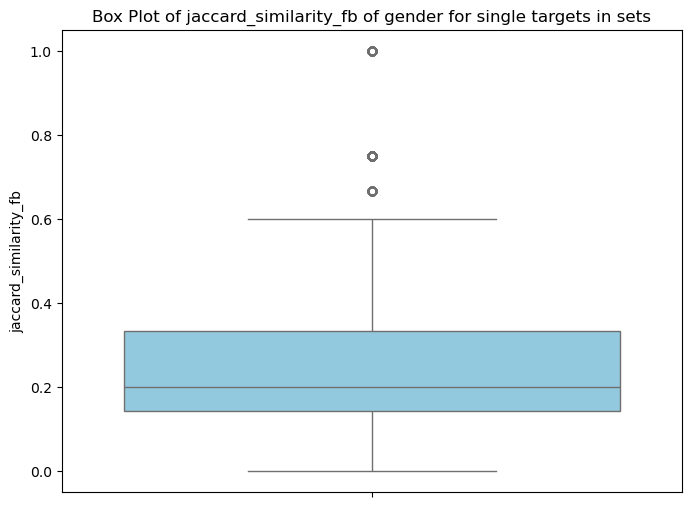

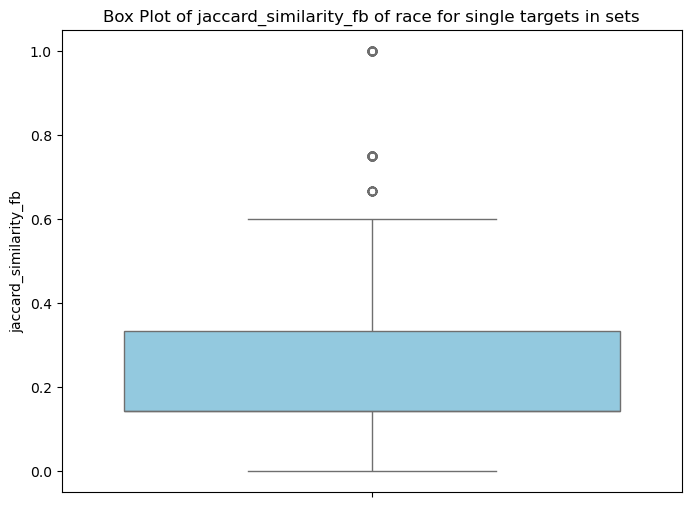

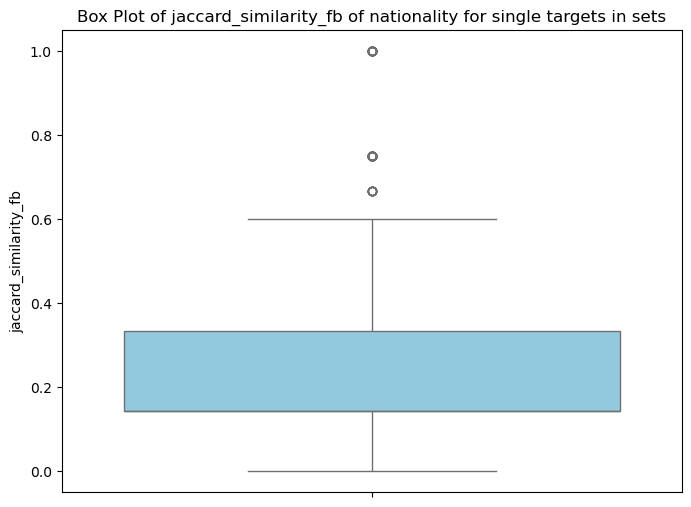

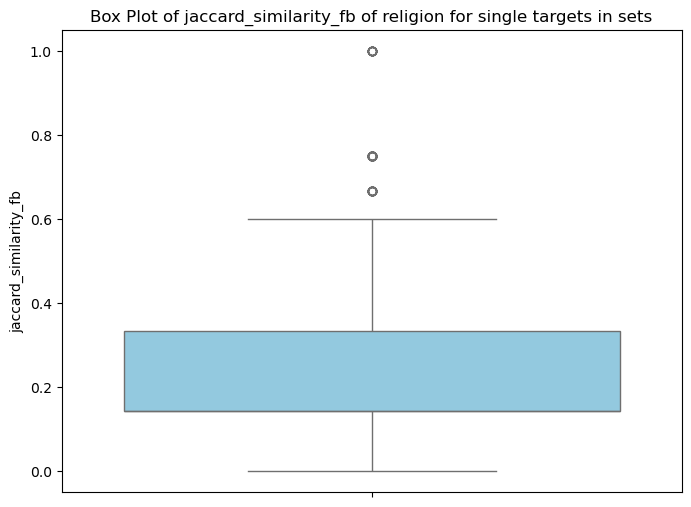

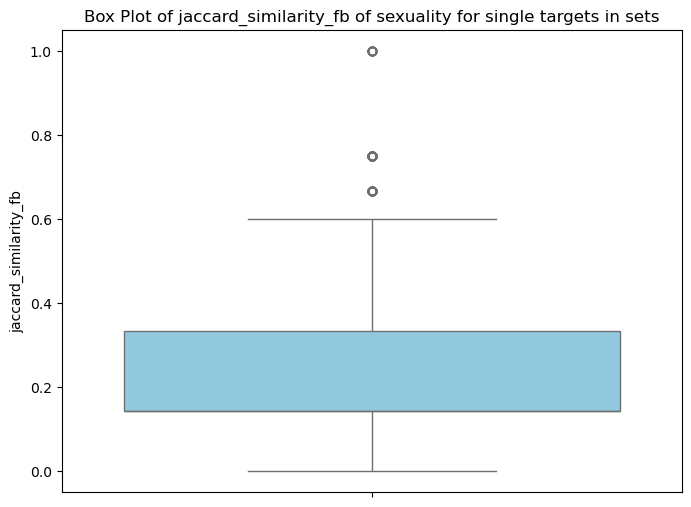

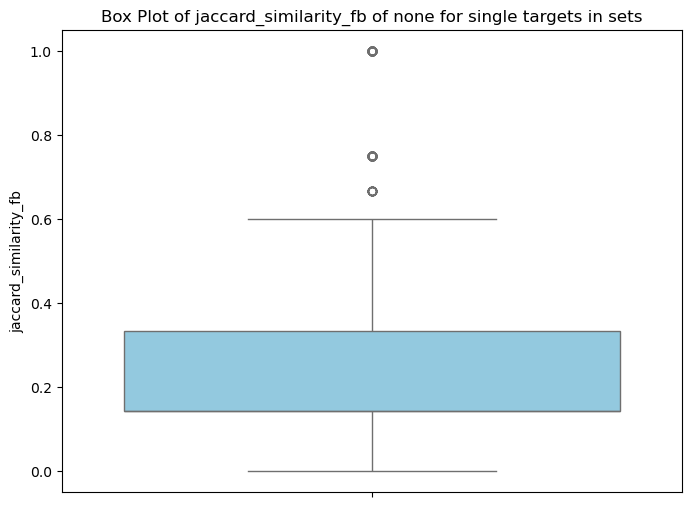

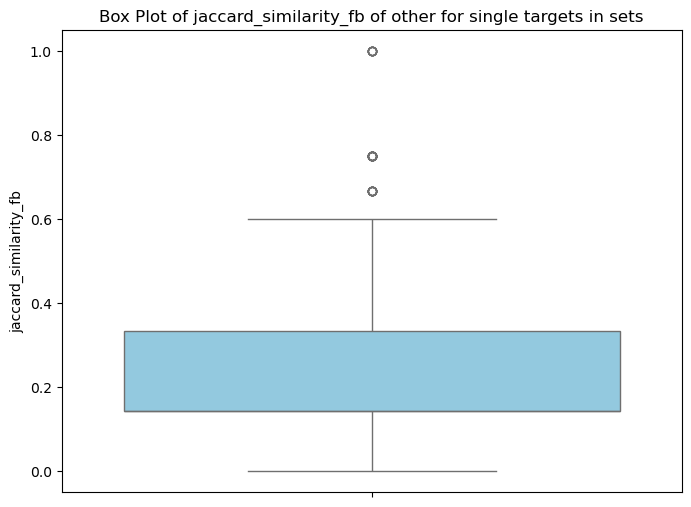

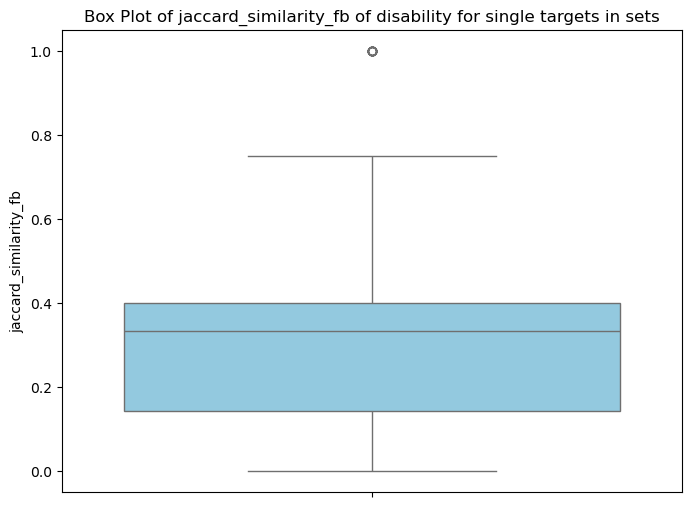

In [64]:
for category in category_names:
    # Filter rows for this specific category
    filtered_df = single_target_full_df[single_target_full_df['extracted_target'] == category]
    create_boxplot(filtered_df,'jaccard_similarity_fb', category, 'single',color='skyblue')

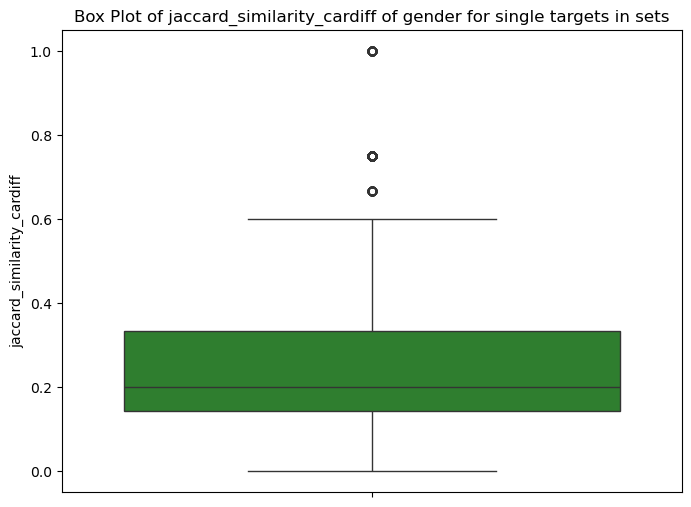

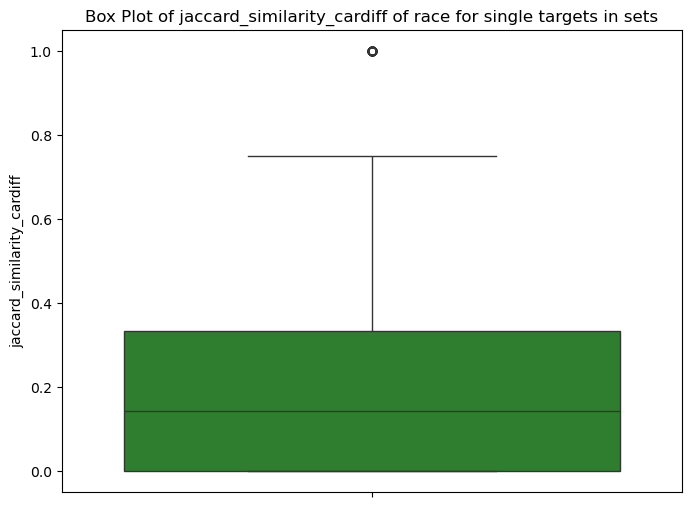

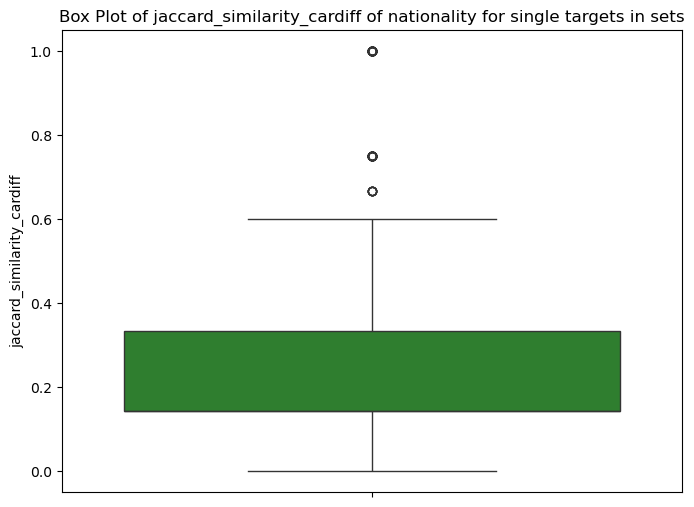

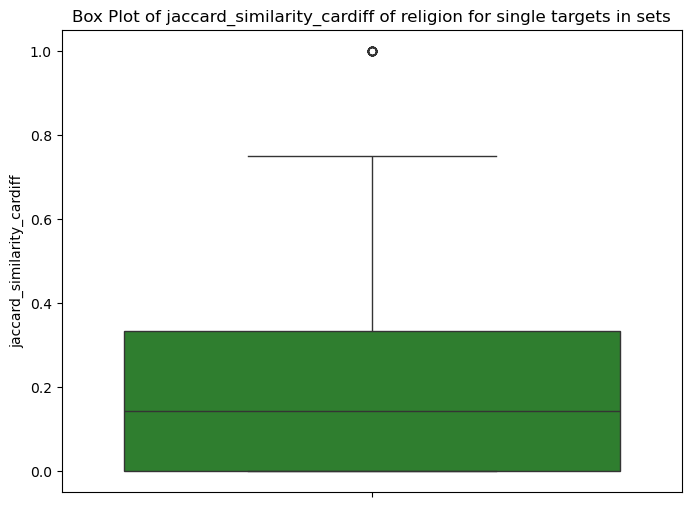

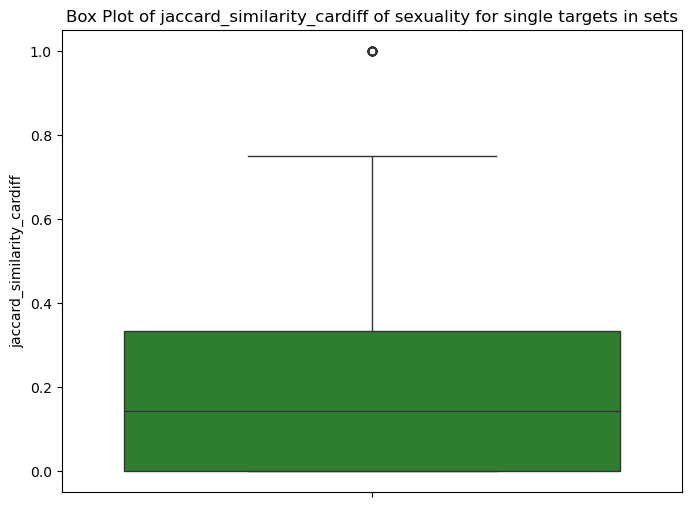

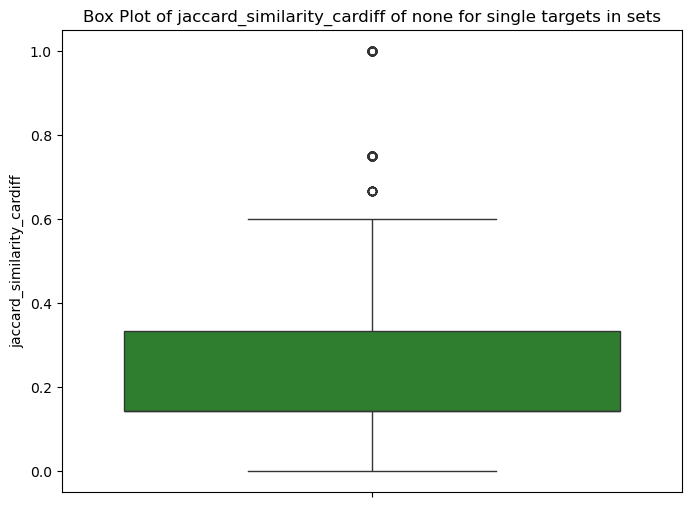

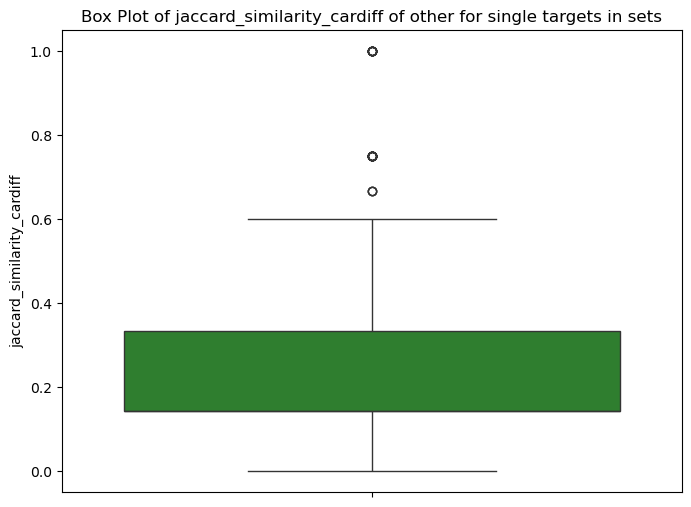

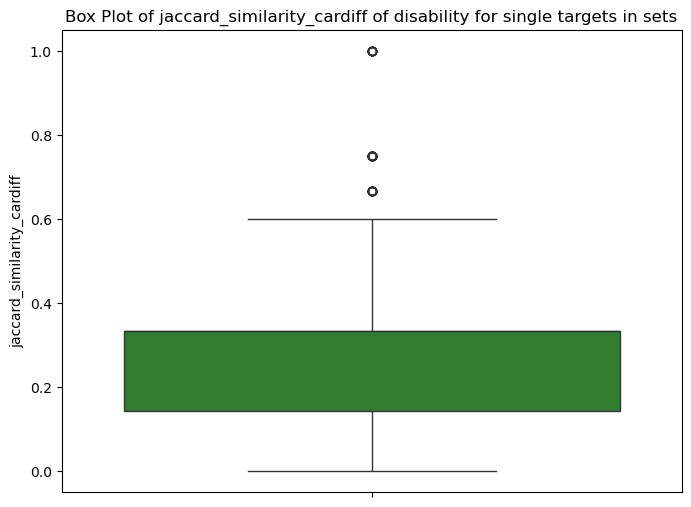

In [65]:
for category in category_names:
    # Filter rows for this specific category
    filtered_df = single_target_full_df[single_target_full_df['extracted_target'] == category]
    create_boxplot(filtered_df,'jaccard_similarity_cardiff', category, 'single')

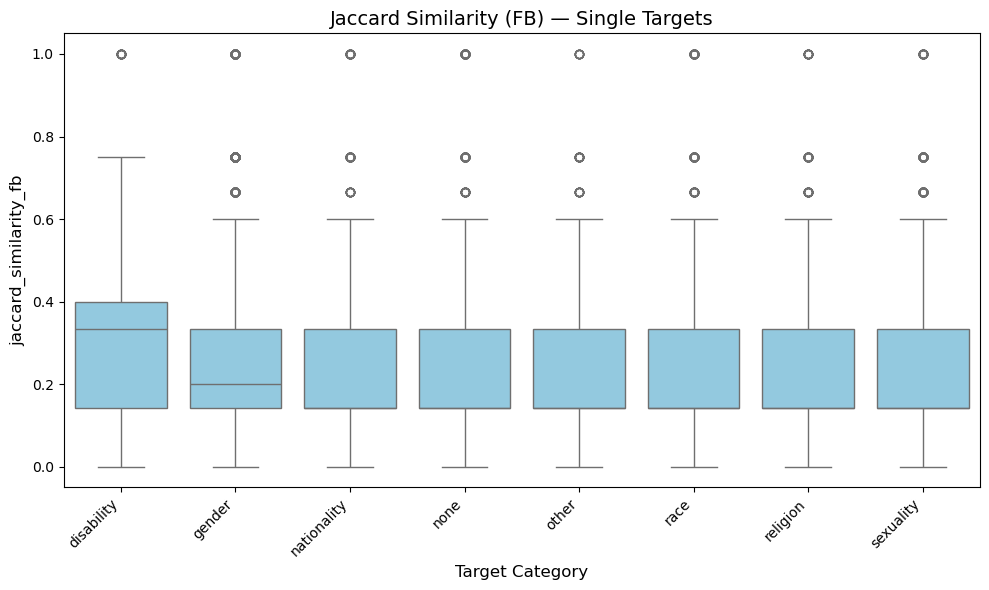

In [79]:
boxplot_by_target(
    single_target_full_df,
    'jaccard_similarity_fb',
    'Jaccard Similarity (FB) — Single Targets',
    'skyblue'
)

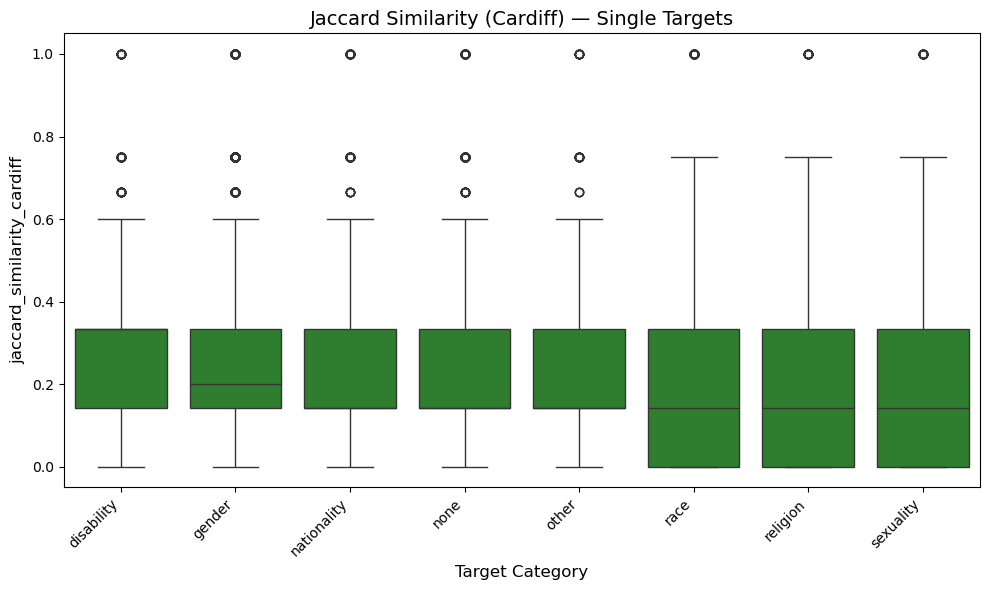

In [80]:
boxplot_by_target(
    single_target_full_df,
    'jaccard_similarity_cardiff',
    'Jaccard Similarity (Cardiff) — Single Targets'
)